In [4]:
import pandas as pd
df = pd.read_csv("../../data/battery_capacity_featured.csv")
df

,cycle,capacity,temperature,capacity_fade_percent,capacity_diff,rolling_capacity_mean,degradation_rate
0,1,2.50,25.00,0.0,NaN,NaN,NaN
1,2,2.47,25.00,3.0,-0.03,2.485,3.0
2,4,2.40,26.00,10.0,-0.07,2.435,7.0
3,5,2.35,25.75,15.0,-0.05,2.375,5.0
4,6,2.30,27.00,20.0,-0.05,2.325,5.0


In [ ]:
# prepareing data for ml
# Define feature (x) and target (y)
x = df[["cycle"]]# 2d structure double bracket to make x axis 2d as in ml x axis is only 2d even if one column 
y = df["capacity_fade_percent"] # 1d target (x = input, y = target)
x.head(), y.head() # this just show first 5 rows of x and y nothing else

(   cycle
 0      1
 1      2
 2      4
 3      5
 4      6,
 0     0.0
 1     3.0
 2    10.0
 3    15.0
 4    20.0
 Name: capacity_fade_percent, dtype: float64)

In [ ]:
# now we will train test split
from sklearn.model_selection import train_test_split # this train test split splits data in to training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42) # test size = 0.3 means 30% data for testing and 70% for training you can changea according to us but 70 percent data for training is godd practice
# random_state=42 ensures same split every time you run this 
print("Training smaples:", len(x_train)) # len( it shows how many rows does this object have) and remember in 2d object it counts rows.
print("Testing samples:", len(x_test))

Training smaples: 3
Testing samples: 2


In [ ]:
from sklearn.linear_model import LinearRegression # as sklearn is already installed we are importing algorithm 
model = LinearRegression() # this creates empty model like blank equation waiting to learn
model.fit(x_train, y_train) # this is learning step it will find y= ax+b it will calculate a and b in such a way that error between actual value and predicted value is minimised it is called least squares method

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
# lets see what it learned
print("slope (coeffiecent):", model.coef_[0]) # this will show a slope value it calculated
print("intercept:", model.intercept_) # this will show intercept value it calculated

slope (coeffiecent): 3.6538461538461533
intercept: -3.846153846153845


In [ ]:
# now lets make prediction now we will predict unseen data 
y_pred = model.predict(x_test) # model = trained linear model, predict() this function is being applied, x_test is unseen test cycles 
print("actual values:")
print(y_test.values)
print("\npredicted values:")
print(y_pred)

actual values:
[ 3. 20.]

predicted values:
[ 3.46153846 18.07692308]


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("mae:", mae)
print("rmse:", rmse)
print("r2:", r2)

mae: 1.192307692307713
rmse: 1.398435304822929
r2: 0.9729325771380597


MAE (Mean abosolute error) MAE = average(|ytrue- ypred|) - ite tells on average how many percentage points are we wrong, our mae is 1.19 that means it is wrong by 1.19 percentage are error it is moderate error
2- RMSE (Root mean squared error) = square root of (average((ytrue-ypred)square)) if rmse increases strongly prediction is very wrong, in our case rmse is slightly lareger than mae bcz rmse penalize larger errors more.
3- R2 = coefficient of Determination( 1= perfect prediction, 0 = same as guessing average, <0 worse than average guessing) in our case it is 0.972 it is extremly high it is good but data was very small but yeahhh victory our model is amazing hahahhaha

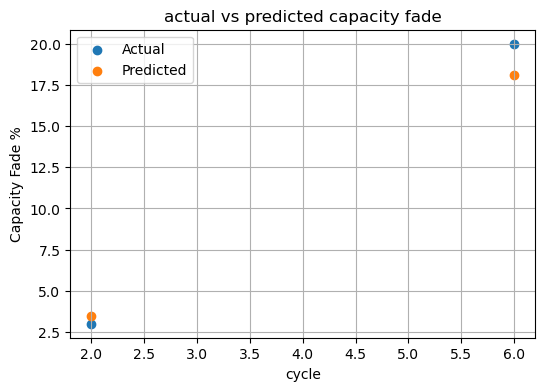

In [ ]:
# Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(x_test, y_test, label="Actual") # x-axis value - xtest (cycle number), y axis value - y test (true fade), label used for legend
plt.scatter(x_test, y_pred, label="Predicted")
plt.xlabel("cycle")
plt.ylabel("Capacity Fade %")
plt.legend()
plt.title("actual vs predicted capacity fade")
plt.grid(True)
plt.savefig("../../figures/day5_regression_plot.png", dpi=300, bbox_inches="tight")
plt.show()

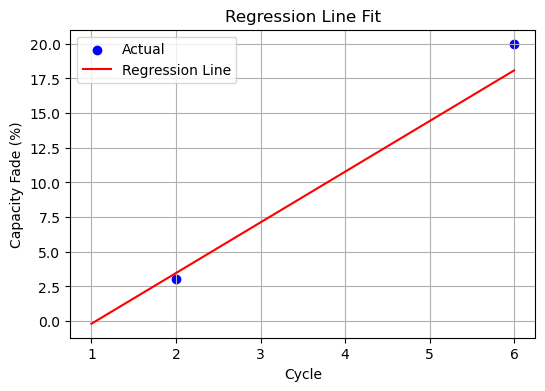

In [ ]:
# SAME THING AGAIN BUT DIFFERENT WAY 
plt.figure(figsize=(6,4))

# Plot actual test points
plt.scatter(x_test, y_test, color="blue", label="Actual")

# Plot regression line using all X values
x_sorted = df[["cycle"]]
y_line = model.predict(x_sorted)

plt.plot(x_sorted, y_line, color="red", label="Regression Line")

plt.xlabel("Cycle")
plt.ylabel("Capacity Fade (%)")
plt.legend()
plt.title("Regression Line Fit")
plt.grid(True)
plt.savefig("../../figures/day5_regression_plot2_with_line.png", dpi=300, bbox_inches="tight")
plt.show()


In [22]:
# save model prediction
df_result = pd.DataFrame({
    "cycle": x_test["cycle"],
    "actual_fade": y_test,
    "predicted_fade": y_pred
})
# df_result = pd.DataFrame({ this created new table inside {} is dictionalry , keys = column names, values = data for each column
df_result.to_csv("../../data/model_predictions.csv", index=False)